# Chapter 4: Training Models

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

## Two ways to train a linear regression model

- 1. "Closed Form" equation
    - Directly computes the model parameters that best fir the model to the training set
    - aka, parameters that minimize the cost function over the training set

- 2. "Gradient Descent"
    - Iterative optimazation approach
    - Gradually tweaking the parameters to minimize the cost function over the training set
    - Eventually converges to the same set of parameters as the first method

## Linear Regression

## Normal Equation

- Creating linear looking data

In [3]:
np.random.rand()

0.01597543458411943

In [4]:
# Random X's from 0 to 2
X = 2 * np.random.rand(100, 1)

In [5]:
# Slope is 3
# X intercept is 4
y = 4 + 3 * X + np.random.randn(100, 1)

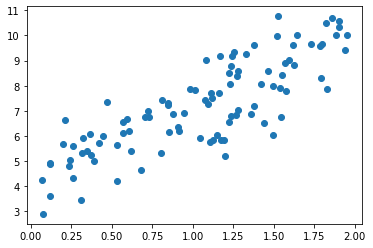

In [6]:
plt.scatter(X, y)

- Goal is to compute the slope, or theta

![alt text](./images/chapter_4/Normal_equation1.png "Title")

In [7]:
# combines an array of ones with the X's
X_b = np.c_[np.ones((100, 1)), X]

In [8]:
X_b[:10]

array([[1.        , 0.59412505],
       [1.        , 0.6035886 ],
       [1.        , 1.10553661],
       [1.        , 0.91210535],
       [1.        , 1.18979647],
       [1.        , 0.72480222],
       [1.        , 0.61846016],
       [1.        , 1.49426416],
       [1.        , 0.68158773],
       [1.        , 0.94680581]])

- Making an vector that's only one so that the dot product doesn't change the X

In [9]:
X_b[:10].T

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.59412505, 0.6035886 , 1.10553661, 0.91210535, 1.18979647,
        0.72480222, 0.61846016, 1.49426416, 0.68158773, 0.94680581]])

In [10]:
# Getting the inverse of the dot product of X and its transpose with the dot product of the transpose of X and y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
theta_best

array([[4.23862927],
       [2.8306811 ]])

## Making predictions using theta

In [12]:
# new x's that encompass the whole x coordinate
X_new = np.array([[0], [2]])

In [13]:
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [14]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [15]:
y_predict = X_new_b.dot(theta_best)

In [16]:
y_predict

array([[4.23862927],
       [9.89999146]])

## Plotting the Predictions

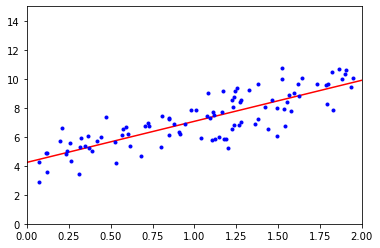

In [17]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

## Comparing it to Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [20]:
lin_reg.coef_

array([[2.8306811]])

In [21]:
lin_reg.intercept_

array([4.23862927])

- Same as normaliztion

In [24]:
lin_reg.predict(X_new)

array([[4.23862927],
       [9.89999146]])

- `LinearRegression` is based on `scipy.linalg.lstsq()` (least squares) 

In [25]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [26]:
theta_best_svd

array([[4.23862927],
       [2.8306811 ]])

In [27]:
residuals

array([104.26503267])

In [28]:
rank

2

In [29]:
s

array([14.96350727,  3.53837451])

- Theta is calculated by the dot product of X+(pseudoinverse of X) and y 
- `np.linalg.pinv()` computes the pseudoinverse

In [30]:
np.linalg.pinv(X_b).dot(y)

array([[4.23862927],
       [2.8306811 ]])

# Current Page: 112